In [63]:
import matplotlib.pyplot as plt
import numpy as np

In [64]:
def loadDataSet():
    dataMat = []                                                        #创建数据列表
    labelMat = []                                                        #创建标签列表
    fr = open('iris2class.txt')                                             
    for line in fr.readlines():                                           
        lineArr = line.strip().split(',')                                    #去回车，放入列表
        dataMat.append([eval(lineArr[0]), eval(lineArr[1]),eval(lineArr[2]),eval(lineArr[3])])        #添加数据
        labelMat.append(eval(lineArr[4]))                                #添加标签
    fr.close()                                                            
    return dataMat, labelMat                                            


In [65]:
def plotDataSet():
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                            #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                    #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                    #绘制label
    plt.show()                                                            #显示



In [66]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [67]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                            #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                        #最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    
    return weights.getA() 


In [72]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                            #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                    #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    x = np.arange(1.0, 6.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')                                                #绘制title
    plt.xlabel('X1'); plt.ylabel('X2')                                    #绘制label
    plt.show()       


[[-0.79512817]
 [-1.34601307]
 [ 2.56873178]
 [ 1.78820333]]


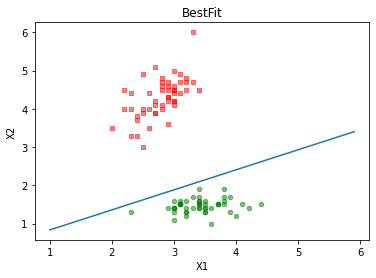

In [73]:
if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()           
    weights = gradAscent(dataMat, labelMat)
    print(weights)
    plotBestFit(weights)
